<a href="https://colab.research.google.com/github/Lucas-Abrahao/Alura-Machine-Learning/blob/main/Alura_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning: Introdução a Classificação com SKLearn

##Projeto 1 - Classificando 

Classificar de acordo com os dados se a variável será um Porco ou um Cachorro

In [ ]:
#Features [ 1 = SIM | 0 = NÃO ]
#porco [Pelo longo ?, Perna curta ?, Late ?]

pig1 = [0,1,0]
pig2 = [0,1,1]
pig3 = [1,1,0]

dog1 = [0,1,1]
dog2 = [1,0,1]
dog3 = [1,1,1]

treino_x = [pig1, pig2, pig3, dog1, dog2, dog3]

#Classes [ 1 = PIG | 0 = DOG ]
treino_y = [1,1,1,0,0,0]

Importando o SKLearn

In [ ]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(treino_x, treino_y)


LinearSVC()

Predict()

In [ ]:
#Classes [ 1 = PIG | 0 = DOG ]
animal = [1,1,1]
model.predict([animal])

array([0])

Testing 

In [ ]:
#Classes [ 1 = PIG | 0 = DOG ]

misterio1 = [1,1,1]
misterio2 = [1,1,0]
misterio3 = [0,1,1]

teste_x = [misterio1, misterio2, misterio3]

previsoes = model.predict(teste_x)
previsoes

array([0, 1, 0])

In [ ]:
teste_y = [0,1,1]

Calculando a Taxa de Acerto

In [ ]:
acertos = (previsoes == teste_y).sum()
total = len(teste_x)

taxa_de_acerto = acertos / total

print("Taxa de Acerto: %.2f" %(taxa_de_acerto * 100))

Taxa de Acerto: 66.67


In [ ]:
from sklearn.metrics import accuracy_score

taxa_de_acerto = accuracy_score(teste_y,previsoes)

print("Taxa de Acerto: %.2f" %(taxa_de_acerto * 100))

Taxa de Acerto: 66.67


##Projeto 2 - Site de Vendas

Classificar se o produto será vendido de acordo com as páginas vizualizadas do site

In [ ]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/2d2efa37d66b6c84a722ea627a897ced/raw/10968b997d885cbded1c92938c7a9912ba41c615/tracking.csv"
dados = pd.read_csv(uri)
dados.head()

,home,how_it_works,contact,bought
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0


In [ ]:
x = dados[['home','how_it_works','contact']]
y = dados['bought']

y.head()

0    0
1    0
2    0
3    0
4    0
Name: bought, dtype: int64

In [ ]:
dados.shape

(99, 4)

In [ ]:
treino_x = x[:75]
treino_y = y[:75]

teste_x = x[75:]
teste_y = y[75:]

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

model = LinearSVC()
model.fit(treino_x,treino_y)

previsoes = model.predict(teste_x)

acuracia = accuracy_score(teste_y,previsoes) *100

print('A taxa de acerto foi de: %.2f%%'%acuracia)

A taxa de acerto foi de: 95.83%


###Usando SKLearn para separar treino e teste

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 20

treino_x,teste_x,treino_y,teste_y = train_test_split(x, y,random_state = SEED, test_size = 0.25)

print(treino_x.shape)

model = LinearSVC()
model.fit(treino_x,treino_y)

previsoes = model.predict(teste_x)

acuracia = accuracy_score(teste_y,previsoes) *100

print('A taxa de acerto foi de: %.2f%%'%acuracia)

(74, 3)
A taxa de acerto foi de: 96.00%


In [ ]:
treino_y.value_counts()

0    47
1    27
Name: bought, dtype: int64

In [ ]:
teste_y.value_counts()

0    19
1     6
Name: bought, dtype: int64

### Estratificando Splits

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 20

treino_x,teste_x,treino_y,teste_y = train_test_split(x, y,random_state = SEED, test_size = 0.25, stratify = y)

print(treino_x.shape)

model = LinearSVC()
model.fit(treino_x,treino_y)

previsoes = model.predict(teste_x)

acuracia = accuracy_score(teste_y,previsoes) *100

print('A taxa de acerto foi de: %.2f%%'%acuracia)

(74, 3)
A taxa de acerto foi de: 96.00%


In [ ]:
treino_y.value_counts()

0    49
1    25
Name: bought, dtype: int64

In [ ]:
teste_y.value_counts()

0    17
1     8
Name: bought, dtype: int64

##Projeto 3 - Site de Freelancing

Classificar se o Trabalho será realizado de acordo com as horas esperadas e o preço

In [ ]:
import pandas as pd

uri = 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'
dados = pd.read_csv(uri)

dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [ ]:
a_renomear = {'expected_hours':'horas','unfinished':'nao_finalizado','price':'preco'}

dados = dados.rename(columns = a_renomear)
dados.head()

,nao_finalizado,horas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [ ]:
troca = {0:1 , 1:0}

dados['finalizado'] = dados.nao_finalizado.map(troca)

dados.head()

,nao_finalizado,horas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


In [ ]:
dados.tail()

,nao_finalizado,horas,preco,finalizado
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


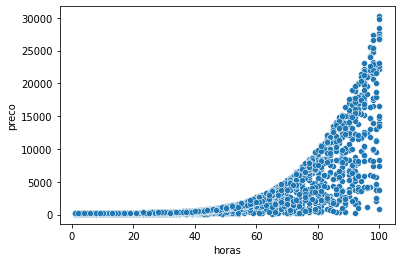

In [ ]:
import seaborn as sns

sns.scatterplot(x = 'horas', y = 'preco', data = dados)

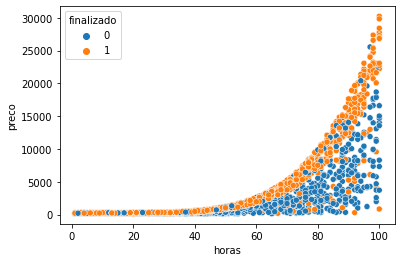

In [ ]:
sns.scatterplot(x = 'horas', y = 'preco', hue = 'finalizado', data = dados)

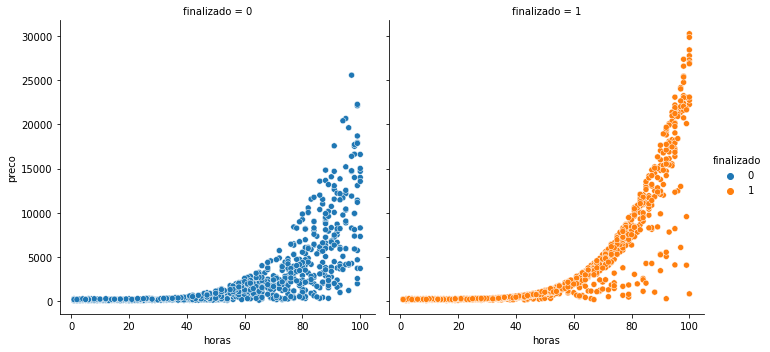

In [ ]:
sns.relplot(x = 'horas', y = 'preco', hue = 'finalizado', col = 'finalizado', data = dados)

In [ ]:
x = dados[['horas','preco']]
y = dados['finalizado']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 20

treino_x,teste_x,treino_y,teste_y = train_test_split(x, y,random_state = SEED, test_size = 0.25, stratify = y)

print('treinaremos com %d elementos e testaremos com %d elementos' %(len(treino_x),len(teste_x)))

model = LinearSVC(dual= False,max_iter=5000)
model.fit(treino_x,treino_y)

previsoes = model.predict(teste_x)

acuracia = accuracy_score(teste_y,previsoes) *100

print('A taxa de acerto foi de: %.2f%%'%acuracia)

treinaremos com 1617 elementos e testaremos com 540 elementos
A taxa de acerto foi de: 54.44%


In [ ]:
import numpy as np

prev_base = np.ones(540)
acuracia = accuracy_score(teste_y,prev_base) *100
print('A taxa de acerto do baseline foi de: %.2f%%'%acuracia)

A taxa de acerto do baseline foi de: 52.59%


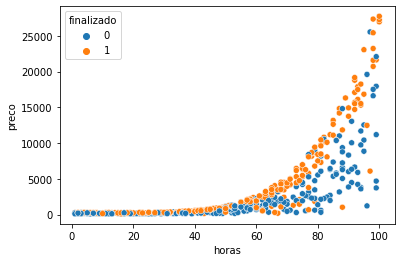

In [ ]:
sns.scatterplot(x = 'horas', y = 'preco', hue = teste_y, data = teste_x)

In [ ]:
x_min = teste_x.horas.min()
x_max = teste_x.horas.max()

y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

print(x_min, x_max, y_min, y_max)

1 100 101 27738


In [ ]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

In [ ]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(),yy.ravel()]

pontos

array([[1.000000e+00, 1.010000e+02],
       [1.990000e+00, 1.010000e+02],
       [2.980000e+00, 1.010000e+02],
       ...,
       [9.703000e+01, 2.746163e+04],
       [9.802000e+01, 2.746163e+04],
       [9.901000e+01, 2.746163e+04]])

In [ ]:
z = model.predict(pontos)
z = z.reshape(xx.shape)
z

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  "X does not have valid feature names, but"


array([[1, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

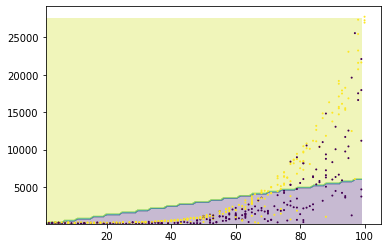

In [ ]:
import matplotlib.pyplot as plt

plt.contourf(xx, yy, z, alpha = 0.3)
plt.scatter(teste_x.horas, teste_x.preco, c = teste_y, s = 1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)

treino_x,teste_x,treino_y,teste_y = train_test_split(x, y, test_size = 0.25, stratify = y)

print('treinaremos com %d elementos e testaremos com %d elementos' %(len(treino_x),len(teste_x)))

model = SVC(gamma='auto')
model.fit(treino_x,treino_y)

previsoes = model.predict(teste_x)

acuracia = accuracy_score(teste_y,previsoes) *100

print('A taxa de acerto foi de: %.2f%%'%acuracia)

treinaremos com 1617 elementos e testaremos com 540 elementos
A taxa de acerto foi de: 59.07%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


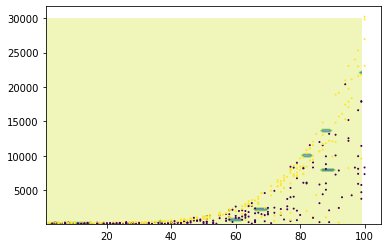

In [ ]:
x_min = teste_x.horas.min()
x_max = teste_x.horas.max()

y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(),yy.ravel()]

z = model.predict(pontos)
z = z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx, yy, z, alpha = 0.3)
plt.scatter(teste_x.horas, teste_x.preco, c = teste_y, s = 1)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)

raw_treino_x,raw_teste_x,treino_y,teste_y = train_test_split(x, y, test_size = 0.25, stratify = y)

print('treinaremos com %d elementos e testaremos com %d elementos' %(len(treino_x),len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

model = SVC(gamma='auto')
model.fit(treino_x,treino_y)

previsoes = model.predict(teste_x)

acuracia = accuracy_score(teste_y,previsoes) *100

print('A taxa de acerto foi de: %.2f%%'%acuracia)


treinaremos com 1617 elementos e testaremos com 540 elementos
A taxa de acerto foi de: 66.85%


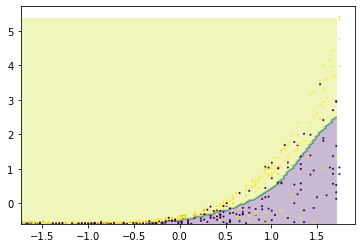

In [ ]:
data_x = teste_x[:,0]
data_y = teste_x[:,1]

x_min = data_x.min()
x_max = data_x.max()

y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(),yy.ravel()]

z = model.predict(pontos)
z = z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx, yy, z, alpha = 0.3)
plt.scatter(data_x, data_y, c = teste_y, s = 1)

##Projeto 4 - Site de Vendas de Carros

Classificar se um carro será vendido ou não

###Tratando os dados

In [ ]:
import pandas as pd

uri = 'https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv'
dados = pd.read_csv(uri)

dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


renomeando as colunas

In [ ]:
arenomear = {'mileage_per_year':"milhas_por_ano",
             'model_year':'ano',
             'price':'preco',
             'sold':'vendido'
             }

dados = dados.rename(columns=arenomear)
dados.head()

,Unnamed: 0,milhas_por_ano,ano,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


trocando os valores de vendido para 0 ou 1

In [ ]:
swap = {'no': 0,
        'yes': 1}
dados.vendido = dados.vendido.map(swap)
dados.head()

,Unnamed: 0,milhas_por_ano,ano,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


importando e usando o ano atual
descobrindo a idade do carro

In [ ]:
from datetime import datetime

ano_atual = datetime.today().year

dados['idade'] = ano_atual - dados.ano
dados.head()

,Unnamed: 0,milhas_por_ano,ano,preco,vendido,idade
0,0,21801,2000,30941.02,1,22
1,1,7843,1998,40557.96,1,24
2,2,7109,2006,89627.50,0,16
3,3,26823,2015,95276.14,0,7
4,4,7935,2014,117384.68,1,8


convertendo milhas para kilometros por ano 

In [ ]:
dados['km_ano'] = dados.milhas_por_ano * 1.60934
dados.head()

,Unnamed: 0,milhas_por_ano,ano,preco,vendido,idade,km_ano
0,0,21801,2000,30941.02,1,22,35085.22134
1,1,7843,1998,40557.96,1,24,12622.05362
2,2,7109,2006,89627.50,0,16,11440.79806
3,3,26823,2015,95276.14,0,7,43167.32682
4,4,7935,2014,117384.68,1,8,12770.11290


retirando as colunas consideradas desnecessárias

In [ ]:
dados = dados.drop(columns = ['Unnamed: 0','milhas_por_ano','ano'], axis = 1)
dados.head()

,preco,vendido,idade,km_ano
0,30941.02,1,22,35085.22134
1,40557.96,1,24,12622.05362
2,89627.50,0,16,11440.79806
3,95276.14,0,7,43167.32682
4,117384.68,1,8,12770.11290


### Classificando 

In [ ]:
x = dados[['preco','idade','km_ano']]
y = dados['vendido']

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)

treino_x,teste_x,treino_y,teste_y = train_test_split(x, y, test_size = 0.25, stratify = y)

print('treinaremos com %d elementos e testaremos com %d elementos' %(len(treino_x),len(teste_x)))

model = LinearSVC(dual = False,max_iter=10000)
model.fit(treino_x,treino_y)

previsoes = model.predict(teste_x)

acuracia = accuracy_score(teste_y,previsoes) *100

print('A taxa de acerto foi de: %.2f%%'%acuracia)

treinaremos com 7500 elementos e testaremos com 2500 elementos
A taxa de acerto foi de: 69.32%


In [ ]:
from sklearn.dummy import DummyClassifier

dummyst = DummyClassifier(strategy='stratified')

dummyst.fit(treino_x,treino_y)

acuracia= dummyst.score(teste_x,teste_y)*100

print('A taxa de acerto do dummy stratified foi de: %.2f%%'%acuracia)

A taxa de acerto do dummy stratified foi de: 52.44%


In [ ]:
from sklearn.dummy import DummyClassifier

dummymf = DummyClassifier(strategy='most_frequent')

dummymf.fit(treino_x,treino_y)

acuracia = dummymf.score(teste_x,teste_y)*100

print('A taxa de acerto do dummy most frequent foi de: %.2f%%'%acuracia)

A taxa de acerto do dummy most frequent foi de: 58.00%


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)

raw_treino_x,raw_teste_x,treino_y,teste_y = train_test_split(x, y, test_size = 0.25, stratify = y)

print('treinaremos com %d elementos e testaremos com %d elementos' %(len(treino_x),len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

model = SVC(gamma='auto',max_iter=10000)
model.fit(treino_x,treino_y)

previsoes = model.predict(teste_x)

acuracia = accuracy_score(teste_y,previsoes) *100

print('A taxa de acerto foi de: %.2f%%'%acuracia)

treinaremos com 7500 elementos e testaremos com 2500 elementos
A taxa de acerto foi de: 77.48%


###Implementando Decision Tree

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)

raw_treino_x,raw_teste_x,treino_y,teste_y = train_test_split(x, y, test_size = 0.25, stratify = y)

print('treinaremos com %d elementos e testaremos com %d elementos' %(len(treino_x),len(teste_x)))



model = DecisionTreeClassifier(max_depth = 3)
model.fit(raw_treino_x,treino_y)

previsoes = model.predict(raw_teste_x)

acuracia = accuracy_score(teste_y,previsoes) *100

print('A taxa de acerto foi de: %.2f%%'%acuracia)

treinaremos com 7500 elementos e testaremos com 2500 elementos
A taxa de acerto foi de: 79.28%


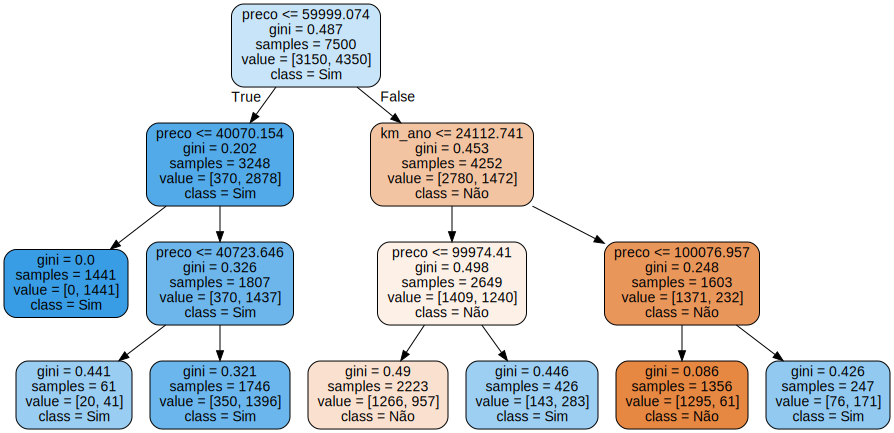

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns

dot_data = export_graphviz(model, feature_names = features, filled = True, rounded = True, class_names = ['Não','Sim'])
grafico = graphviz.Source(dot_data)
grafico

#Machine Learning: Classificação por trás dos panos

Teoria e Desenvolvimento do Curso "Machine Learning: Introdução a Classificação com SKLearn